# The heat equation

The heat equation is a partial differential equation that describes how the temperature of a physincal system changes over time. It is typically written as:

$$
    \frac{\partial u}{\partial t} = k \frac{\partial u^2}{\partial x^2}
$$

<span style="width=100%; display=flex;justify-content=center;"><img src="images/heat-rod.png"/><span/>

## Discretização por diferenças finitas

$$
    \left.\begin{matrix}
    {f}''\simeq \frac{f(x+h)-2f(x)+f(x-h)}{h^2}\\
    {f}'\simeq \frac{f(x+h)-2f(x)+f(x-h)}{h^2}
    \end{matrix}\right\}
    \frac{u(t+h_t,x)-u(t,x)}{h_t}\simeq \frac{f(t,x+h_s)-2f(t,x)+f(t,x-h_s)}{h_s^2}\therefore\\
    u(t+h_t,x)\simeq  h_t\times k\frac{f(t,x+h_s)-2f(t,x)+f(t,x-h_s)}{h_s^2} + u(t,x)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
length = 10
k = 0.89
total_sim_time = 10
# B.C.
temp_left = 100
temp_right = 200

In [3]:
h_s = .1
x_vector = np.linspace(0,length,int(length/h_s))
x_vector

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [5]:
h_t = 1e-4
t_vector = np.linspace(0,total_sim_time,int(total_sim_time/h_t))
t_vector

array([0.00000e+00, 1.00001e-04, 2.00002e-04, ..., 9.99980e+00,
       9.99990e+00, 1.00000e+01])

In [7]:
# I.C.
u = np.zeros((len(t_vector),len(x_vector)))
u.shape

(100000, 100)

In [9]:
# Applying boundary conditions
u[:,0]= temp_left
u[:,-1]= temp_right

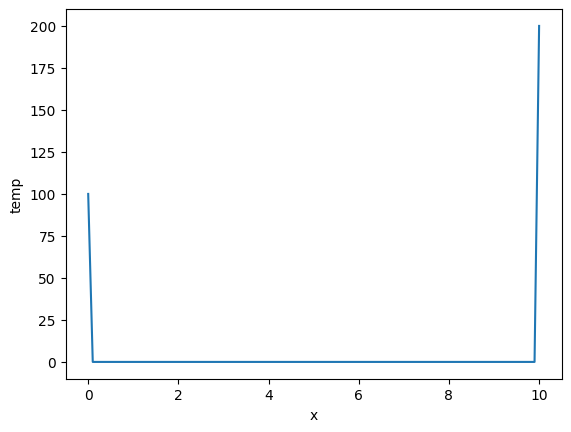

In [15]:
plt.plot(x_vector,u[0])
plt.ylabel("temp")
plt.xlabel("x")
plt.show()

In [20]:
for t in range(1,len(t_vector)-1):
    for x in range(1,len(x_vector)-1):
        u[t+1,x] = (k*h_t/h_s**2) * (u[t,x+1]-2*u[t,x]+u[t,x-1]) + u[t,x]

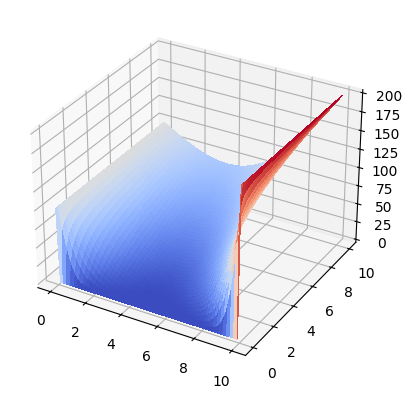

In [32]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


X, Y = np.meshgrid(x_vector, t_vector)

# Plot the surface.
surf = ax.plot_surface(X, Y, u, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


fig.xlabel = "x"
fig.ylabel = "time"
fig.zlabel = "temperature"

plt.show()